In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OneHotEncoder,RareLabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve 
import sys
import joblib
from feature_engine.imputation import MeanMedianImputer,CategoricalImputer 
from sklearn.pipeline import Pipeline
import scipy.stats as stat
sys.modules['sklearn.externals.joblib'] = joblib
import pylab
import seaborn as sns

In [ ]:
! pip install feature_engine

# Read Data

In [3]:
def read_data():
  df_icu=pd.read_csv("/content/mortality.csv")
  return df_icu

# Categorize Variables

In [ ]:
def categ_features(df):
  num_features=[i for i in df.columns if df.dtypes[i]!='object']
  cat_features=[i for i in df.columns if df.dtypes[i]=='object']
  return num_features,cat_features 

In [ ]:
def drop_features(df,feature):
  df.drop(columns=[feature], inplace=True)

# Getting missing features

In [ ]:
def get_miss_features(df):
   ls=df.isnull().mean()>0
   mask=ls.values==True
   ls=list(ls[mask].index)
   return ls

# Missing Value Imputation

In [ ]:
def miss_impute(num_features,cat_features,df):
    pipe = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(
                imputation_method="median", variables=num_features
            ),
        ),
       
       
    ]
)
    df_emp_t=pipe.fit_transform(df)
    return df_emp_t

# Plot Distribution

In [ ]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [ ]:
def plot_dist_num_features(num_features,df):
 for i in num_features:
    plt.figsize=(10,5)
    sns.boxplot(y=df[i])
    plt.show()

In [ ]:
df_icu=read_data()

In [ ]:
num_features,cat_features =categ_features(df_icu)
if len(num_features)!=0:
  print("Numerical Features are :",num_features)
elif len(cat_features)!=0:
  print("Categorical Features are :",cat_features)
else:
   print("")

Numerical Features are : ['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2', 'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate', 'Lactic acid', 'PCO2', 'EF']


In [ ]:
df_icu.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [ ]:
df_icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [ ]:
df_icu.isnull().sum()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='outcome'>

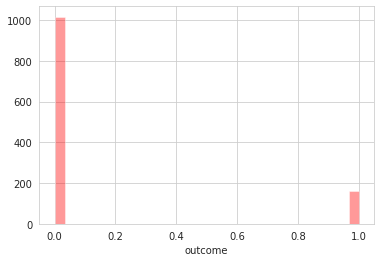

In [ ]:
# set the background style of the plot
sns.set_style('whitegrid')
sns.distplot(df_icu['outcome'], kde = False, color ='red', bins = 30)


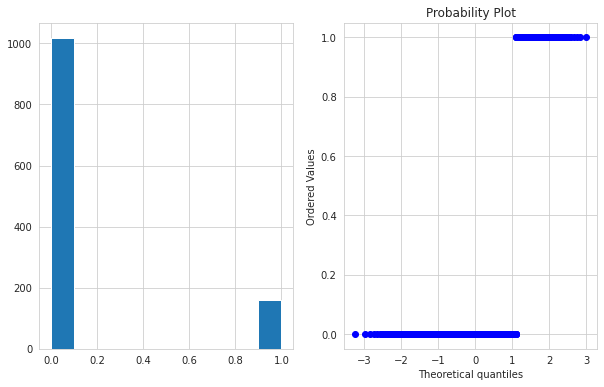

In [ ]:
plot_curve(df_icu,'outcome')

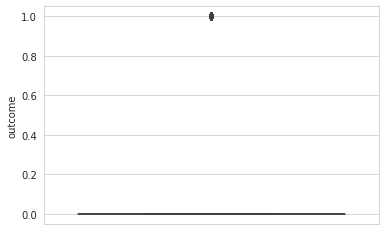

In [ ]:
plot_dist_num_features(['outcome'],df_icu)

In [ ]:
ls=get_miss_features(df_icu)
len(ls)
ls

['outcome',
 'BMI',
 'heart rate',
 'Systolic blood pressure',
 'Diastolic blood pressure',
 'Respiratory rate',
 'temperature',
 'SP O2',
 'Urine output',
 'Neutrophils',
 'Basophils',
 'Lymphocyte',
 'PT',
 'INR',
 'Creatine kinase',
 'glucose',
 'Blood calcium',
 'PH',
 'Lactic acid',
 'PCO2']

In [ ]:
#df_icu.skew(ls)
df_icu[ls].skew(axis = 0, skipna = True)

outcome                      2.136401
BMI                          2.243962
heart rate                   0.299752
Systolic blood pressure      0.704523
Diastolic blood pressure     0.608444
Respiratory rate             0.547230
temperature                  0.133369
SP O2                       -1.383918
Urine output                 1.408273
Neutrophils                 -2.016974
Basophils                   10.182619
Lymphocyte                   2.474391
PT                           2.676831
INR                          2.708794
Creatine kinase             25.112385
glucose                      1.461745
Blood calcium                0.146245
PH                          -0.278541
Lactic acid                  2.229956
PCO2                         1.206786
dtype: float64